#Introduction to Regression Project

##Problem Statement


Mobile carrier Megaline has found out that many of their subscribers use legacy plans.
They want to develop a model that would analyze subscribers' behavior and recommend
one of Megaline's newer plans: Smart or Ultra.
You have access to behavior data about subscribers who have already switched to the
new plans (from the project for the Statistical Data Analysis course). For this
classification task, you need to develop a model that will pick the right plan. Since you’ve
already performed the data preprocessing step, you can move straight to creating the
model.
Develop a model with the highest possible accuracy. In this project, the threshold for
accuracy is 0.75. Check the accuracy using the test dataset.


## Data Importation

In [3]:
import pandas as pd

# Dataset URL (CSV File): https://bit.ly/UsersBehaviourTelco

meg_df = pd.read_csv("https://bit.ly/UsersBehaviourTelco")
meg_df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


##Data Exploration

In [4]:
#get the shape of the df
meg_df.shape

(3214, 5)

In [5]:
# Describe the Data
meg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
# descripe data
meg_df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [7]:
#see the amount of data on each target
meg_df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

In [8]:
# Expressing those promoted and those not as a percentage
print('1. Smart plans users %,  ' 
      + str(round(((meg_df["is_ultra"].isin([0]).sum())/meg_df.shape[0])*100,2)) + ' %')
print('2. Smart plans users on Ultra plan % , ' 
      + str(round(((meg_df["is_ultra"].isin([1]).sum())/meg_df.shape[0])*100,2)) + ' %')

1. Smart plans users %,  69.35 %
2. Smart plans users on Ultra plan % , 30.65 %


##Data Cleaning 

Data cleaning has already been done for this data set as per the instructions

*Since you’ve already performed the data preprocessing step, you can move straight to creating the model*

##Data Preparation

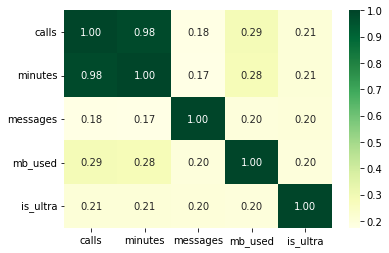

In [9]:
# check correlation of features and target

import matplotlib.pyplot as plt
import seaborn as sns

features = meg_df.columns
corr_= meg_df[features].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "YlGn");

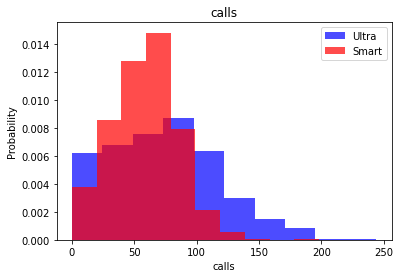

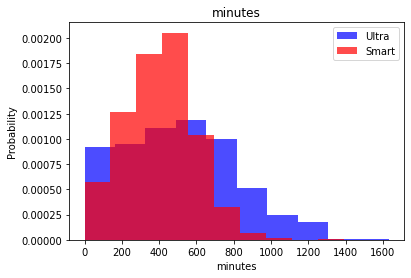

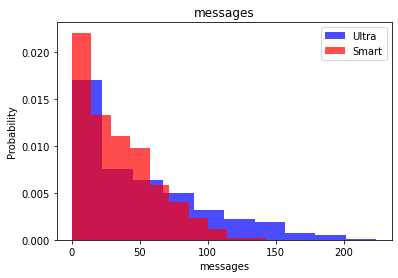

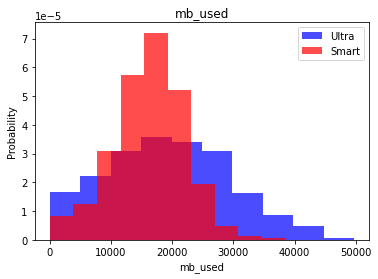

In [10]:
# plot Histogram for features to show relationship between them and target 
for feature in features[:-1]:
  plt.hist(meg_df[meg_df['is_ultra']==1][feature], color= 'blue', alpha = 0.7, label = 'Ultra', density=True)
  plt.hist(meg_df[meg_df['is_ultra']==0][feature], color= 'red', alpha = 0.7, label = 'Smart', density=True)
  plt.title(feature)
  plt.ylabel('Probability')
  plt.xlabel(feature)
  plt.legend()
  plt.show()

In [11]:
# Split the source data into a training set, a validation set, and a test set.
from sklearn.model_selection import train_test_split

In [12]:
features = meg_df.drop(['is_ultra'], axis=1)
target = meg_df['is_ultra']

# set aside 20% of train and test data for evaluation
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 54321)

# Use the same function above for the validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state= 54321) # 0.25 x 0.8 = 0.2

# Check the shape of our new datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")
print(f"X_val shape: {Y_train.shape}")
print(f"Y_val shape: {Y_test.shape}")

X_train shape: (1928, 4)
X_test shape: (643, 4)
Y_train shape: (1928,)
Y_test shape: (643,)
X_val shape: (1928,)
Y_val shape: (643,)


##Data Modeling

In [1]:
# 3. Investigate the quality of different models by changing hyperparameters. Briefly
# describe the findings of the study.

In [13]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# RandomForestRegressor and is located in sklearn.ensemble module.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dec_regressor = DecisionTreeClassifier(random_state=27)
log_regressor = LogisticRegression()
fst_regressor = RandomForestClassifier(random_state= 14)


dec_regressor.fit(X_train, Y_train)
log_regressor.fit(X_train, Y_train)
fst_regressor.fit(X_train, Y_train)

# Making Predictions using the validation set
dec_y_pred = dec_regressor.predict(X_val)
log_y_pred = log_regressor.predict(X_val)
fst_y_pred = fst_regressor.predict(X_val)

from sklearn.metrics import mean_squared_error
# Finally, evaluating our models 
print(f'Decision Tree RMSE: {mean_squared_error(Y_val, dec_y_pred, squared=False)}')
print(f'Linear Regression RMSE:{mean_squared_error(Y_val, log_y_pred, squared=False)}')
print(f'Random Forest Classifier RMSE: {mean_squared_error(Y_val, fst_y_pred, squared=False)}')



Decision Tree RMSE: 0.5050291400982393
Linear Regression RMSE:0.5156945821140386
Random Forest Classifier RMSE: 0.4136098341043249


In [14]:
from sklearn.metrics import classification_report
# print classification report for Decision Tree Regressor
print(f'DecisionTreeClassifier classification report:\n {classification_report(Y_test, dec_y_pred)}')

DecisionTreeClassifier classification report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68       427
           1       0.35      0.32      0.34       216

    accuracy                           0.57       643
   macro avg       0.51      0.51      0.51       643
weighted avg       0.56      0.57      0.57       643



In [15]:
# print classification report for Logistic Regression
print(f'Logistic Regression classification report:\n {classification_report(Y_test, log_y_pred)}')

Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.66      0.97      0.79       427
           1       0.33      0.03      0.05       216

    accuracy                           0.65       643
   macro avg       0.50      0.50      0.42       643
weighted avg       0.55      0.65      0.54       643



In [16]:
# print classification report for Random Forest Classifier 
print(f'Random Forest Classifier classification report:\n {classification_report(Y_test, fst_y_pred)}')

Random Forest Classifier classification report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.71       427
           1       0.34      0.24      0.28       216

    accuracy                           0.59       643
   macro avg       0.51      0.50      0.50       643
weighted avg       0.56      0.59      0.57       643



From the analysis the model perfomance accuracy were as follows:

DecisionTreeClassifier 0.57

Logistic Regression 0.65

Random Forest Classifier 0.59 

###Model Improvement with Hyperparameters

In [17]:
##find the best tree depth with best accuracy
from sklearn.metrics import accuracy_score
best_score = 0
for depth in range(1,10):
  model = DecisionTreeClassifier(max_depth=depth, random_state=27)
  model.fit(X_test, Y_test)
  pred = model.predict(X_val)
  score = accuracy_score(Y_val, pred)
  if score > best_score: best_score = score
print(f'Tree accuracy with Validation: {best_score} at depth of: {depth}')

Tree accuracy with Validation: 0.807153965785381 at depth of: 9


In [18]:
#find the best n estimator for random forest with best accuracy
best_score = 0
for n in range(1,20):
  model = RandomForestClassifier(n_estimators=n, random_state=12345)
  model.fit(X_train, Y_train)
  score = model.score(X_val, Y_val)
  if score > best_score: best_score = score
print(f'Forest accuracy with Validation: {best_score} for n trees: {n}')

Forest accuracy with Validation: 0.8242612752721618 for n trees: 19


In [19]:
# Retrain our models with hyper parameteres 
dec_regressor = DecisionTreeClassifier(random_state=27,max_depth = 9 )
log_regressor = LogisticRegression()
fst_regressor = RandomForestClassifier(random_state= 14, n_estimators = 19)

In [20]:
dec_regressor.fit(X_train, Y_train)
log_regressor.fit(X_train, Y_train)
fst_regressor.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=19, random_state=14)

##Model Evaluation

In [21]:
# 4. Check the quality of the model using the test set.

# Making Predictions using the test set
dec_y_pred = dec_regressor.predict(X_test)
log_y_pred = log_regressor.predict(X_test)
fst_y_pred = fst_regressor.predict(X_test)


# evaluating our models 
print(f'Decision Tree RMSE: {mean_squared_error(Y_test, dec_y_pred, squared=False)}')
print(f'Linear Regression RMSE:{mean_squared_error(Y_test, log_y_pred, squared=False)}')
print(f'Random Forest Classifier RMSE: {mean_squared_error(Y_test, fst_y_pred, squared=False)}')

Decision Tree RMSE: 0.4877982399123497
Linear Regression RMSE:0.5714841119420357
Random Forest Classifier RMSE: 0.4748741340974856


In [22]:
# 5. Additional task: sanity check the model. This data is more complex than what
# you’re used to working with, so it's not an easy task. We'll take a closer look at it
# later.

In [23]:
from sklearn.metrics import classification_report
# print classification report for Decision Tree Classifier 
print(f'DecisionTreeClassifier classification report:\n {classification_report(Y_test, dec_y_pred)}')

DecisionTreeClassifier classification report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       427
           1       0.76      0.43      0.55       216

    accuracy                           0.76       643
   macro avg       0.76      0.68      0.69       643
weighted avg       0.76      0.76      0.74       643



In [24]:
# print classification report for Logistic Regression
print(f'Logistic Regression classification report:\n {classification_report(Y_test, log_y_pred)}')

Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.67      0.98      0.80       427
           1       0.65      0.06      0.11       216

    accuracy                           0.67       643
   macro avg       0.66      0.52      0.46       643
weighted avg       0.67      0.67      0.57       643



In [25]:
# print classification report for Random Forest Regressor
print(f'Random Forest Classifier classification report:\n {classification_report(Y_test, fst_y_pred)}')

Random Forest Classifier classification report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       427
           1       0.75      0.50      0.60       216

    accuracy                           0.77       643
   macro avg       0.77      0.71      0.72       643
weighted avg       0.77      0.77      0.76       643



##Findings and Recommendations

After performing hyperparameter tunning, the accuracy score of our model is as follows: 

DecisionTreeClassifier 0.76 

Logistic Regression 0.67

Random Forest Classifier 0.77

The score gives as a conclusion that it is possible to predict the plan of customers to wether they are on smart or ultra with a fine accuracy.
Decision Tree and Random Forest perfromed better and therefore it is recommended to be used by the customer.